<a href="https://colab.research.google.com/github/toluntosun21/Biometrics/blob/master/Eigenfaces/Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CALCULATING EIGENFACES**

In [0]:
#let's first upload files
from google.colab import files
uploaded = files.upload()

Saving X_train.csv to X_train.csv
Saving X_test.csv to X_test.csv
Saving Y_test.csv to Y_test.csv
Saving Y_train.csv to Y_train.csv


computing the mean

234
num images:  320
[array([48, 49, 45, ..., 47, 46, 46]), array([60, 60, 62, ..., 32, 34, 34]), array([39, 44, 53, ..., 29, 26, 29]), array([63, 53, 35, ..., 41, 10, 24]), array([64, 76, 80, ..., 35, 37, 39]), array([ 43,  50,  41, ..., 158, 153, 169]), array([41, 47, 47, ..., 35, 37, 38]), array([44, 43, 32, ..., 43, 43, 37]), array([30, 37, 35, ..., 26, 27, 32]), array([34, 36, 35, ..., 32, 25, 25]), array([35, 32, 36, ..., 25, 28, 29]), array([34, 35, 35, ..., 31, 24, 24]), array([ 38,  35,  36, ..., 138, 142, 141]), array([ 34,  39,  35, ..., 135, 138, 148]), array([37, 35, 35, ..., 26, 28, 28]), array([ 35,  36,  37, ..., 144, 147, 143]), array([103, 105, 104, ...,  44,  38,  43]), array([100,  99, 108, ...,  44,  42,  44]), array([101, 106, 102, ...,  46,  50,  45]), array([105, 102, 108, ...,  42,  35,  37]), array([101, 104, 104, ...,  42,  46,  43]), array([110, 106, 109, ...,  49,  53,  53]), array([109, 111, 108, ...,  52,  55,  48]), array([107, 104, 109, ...,  58,  56,  

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


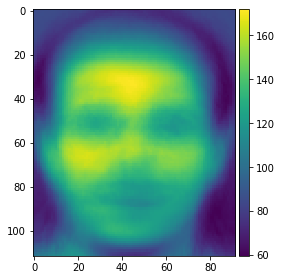

In [0]:
from IPython.display import Image, display
from skimage.io import imshow
import numpy as np


with open('X_train.csv') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
content = list(map(lambda x: (list(map(lambda y:int(y),x.split(',')))),content))
content = list(map(lambda x:np.array(x),content))
#content = list(map(lambda x:np.reshape(x, (-1, 92)),content))
numFeatures=112*92
numImages=len(content)
print('num images: ',numImages)

import functools 

mean = functools.reduce(lambda a,b : a+b,content)/numImages
meanImage = np.reshape(mean, (-1, 92))


print('The Mean Face: ')
imshow(meanImage)
SubtractedContent=list(map(lambda x:x-mean,content))


**CREATING THE COVARIANCE MATRIX**

In [0]:
def Transpose(arr): 
  return np.reshape(arr, (-1, len(arr)))

def CartesienProduct(arr):
  return np.reshape(arr, (-1, 1)).dot(Transpose(arr))  
  
  
print(len(SubtractedContent))
sum=CartesienProduct(SubtractedContent[0])
for i in range(1,numImages):
  if(i%50==0):
    print(i)
  sum=sum+CartesienProduct(SubtractedContent[i])

covMat=sum//numImages
print(covMat)  

320
[[1406.48438477 1364.29336914 1526.7287793  ... 1089.58297852
  1082.19955078 1033.67988281]
 [1364.29336914 1323.36797852 1480.93073242 ... 1056.89821289
  1049.73626953 1002.67207031]
 [1526.7287793  1480.93073242 1657.25321289 ... 1182.73456055
  1174.71990234 1122.05214844]
 ...
 [1089.58297852 1056.89821289 1182.73456055 ...  844.08407227
   838.36423828  800.77675781]
 [1082.19955078 1049.73626953 1174.71990234 ...  838.36423828
   832.68316406  795.35039063]
 [1033.67988281 1002.67207031 1122.05214844 ...  800.77675781
   795.35039063  759.69140625]]
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
[[1270. 1257. 1258. ... -148.  -95.  -11.]
 [1257. 1260. 1255. ... -139.  -85.   -6.]
 [1258. 1255. 1266. ... -149.  -92.  -16.]
 ...
 [-148. -139. -149. ... 2199. 1944. 1745.]
 [ -95.  -85.  -92. ... 1944. 1982. 1799.]
 [ -11.   -6.  -16. ... 1745. 1799. 1853.]]


**COMPUTING EIGEN VALUES-VECTORS**

with the help of Covariance matrix, eigen vectors are computed. 

In [0]:
#above code computes the covariance matrix, let's compute the eigen vectors

from scipy.linalg import eigh

#computing the 50 largest eigen-valued matrices
w, v = eigh(covMat,eigvals=(numFeatures-50,numFeatures-1))



In [0]:
vT=(v.transpose()) #better in transpose rep

#TEST CODE FOR EIGEN VALUE-VECTOR CONCEPT---------------
firstEigenVec=vT[40]
firstEigenVal=w[40]
mult=covMat.dot(firstEigenVec)
mult2=firstEigenVec.dot(firstEigenVal)
print(len(mult))
print(mult)
print(len(mult2))
print(mult2)
#TEST PURPOSE ONLY---------------------------------------

10304
[ 652.0351371   734.1177652   638.27037457 ... 2697.71745421 2151.97721607
 2125.50644166]
10304
[ 652.0351371   734.1177652   638.27037457 ... 2697.71745421 2151.97721607
 2125.50644166]


**DISPLAYING EIGEN-VECTORS**

Here we basically print the most significant 10 eigen-vectors. Here, most signifiacant means the ones with largest eigen-values. Becauase they will lead the most variance on $u_k^Tx$

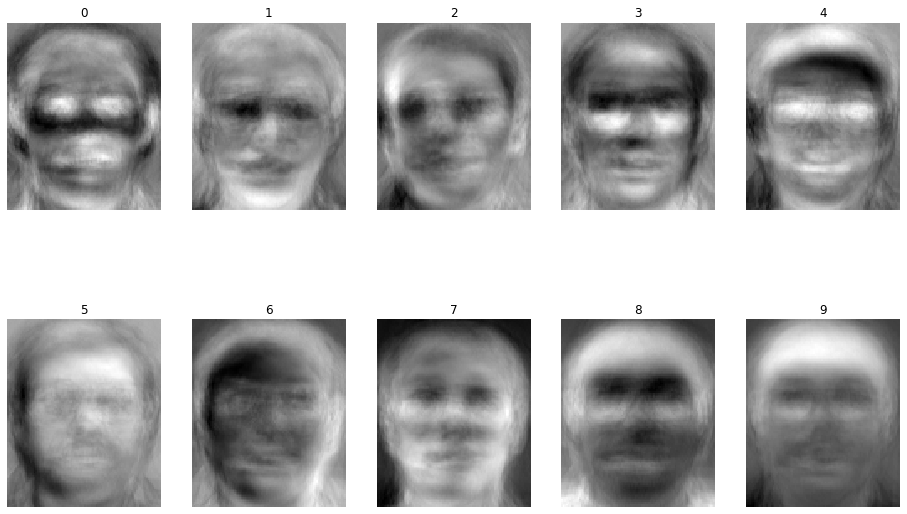

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 10))
columns = 5
rows = 2



for i in range(columns*rows):
    g=np.reshape(vT[40+i], (-1, 92))
    subImg=( fig.add_subplot(rows, columns, i+1) )
    subImg.set_title(i)  # set title
    plt.imshow(g, cmap='gray', interpolation='none') 
    plt.axis('off')

plt.show()  

**VISUALIZING FACES ALONG EIGEN-VECTORS**

First, we need to transform the sample set to face-space. Then we can measure the $\sigma_k$ s to visualize eigenfaces

In [0]:
print(len(vT))
transformedContent=list(map(lambda x:vT.dot(x),SubtractedContent))
print(transformedContent[0])

50
[ -283.94146461   121.13078913   102.29778585   -26.50656942
  -121.75979394    -4.82165593  -112.10446972    35.67860849
   452.0669251   -236.32282226   169.07122849    22.84102262
  -297.8861747    101.9490397   -160.22699362  -324.71488028
   254.5210562    -70.29004488   212.57531519   324.17678233
  -135.4696327    216.00242451   -50.23051736  -193.6035141
  -287.6247069    -87.79890901    76.00337482   542.28809704
  -124.10518785  -281.23041354   -35.77307196  -133.58522894
  -621.75464583  -160.41027759   415.4168151    -47.93130731
  -130.40007102  -395.73065948   -98.60196873  -325.66580308
  1011.43170641   647.29175767   -32.37730101   563.13751496
    48.19017607  -476.58227713    34.49924797  1926.35221753
 -1326.25246115  1380.50528698]


let's compute the standard deviations($\sigma_k$) at each direction

In [0]:
meanTransform=functools.reduce(lambda a,b : a+b,transformedContent)/numImages
variances=list(map(lambda x:(x-meanTransform)**2,transformedContent))
variancesReduced=functools.reduce(lambda a,b : a+b,variances)/(numImages-1)
stDevs=np.sqrt(variancesReduced)
print(stDevs)


[ 199.30731886  200.27148649  204.57252375  207.42025134  209.21668456
  209.97456415  215.45495915  218.2331897   221.33939444  223.08815829
  225.92144017  230.87621413  233.95531083  240.76827719  244.24519491
  249.32434836  252.68357878  257.22490581  262.41130978  267.05502886
  273.18229437  275.82938657  281.12814554  284.34641024  289.58373183
  295.58430931  299.8737083   314.43173246  323.74788058  331.97882221
  343.11630869  352.79685481  372.91218933  379.46881209  381.30478413
  398.66539471  419.40646209  426.09300512  468.70189165  496.78710936
  548.71882441  563.02293126  624.18152222  630.79457185  737.3065348
  895.66578414  937.11964676 1055.65528869 1430.20774386 1707.97154839]


observe that $\sigma_k$ increaes as $k$ increases. The array stDevs stores the standard deviation values at each direction from least significant to most significant direction. the k-th element stores $\sigma_k$ and notice that stdDev[k] increases as k increases. This very important to understand all what we have done.

320
50


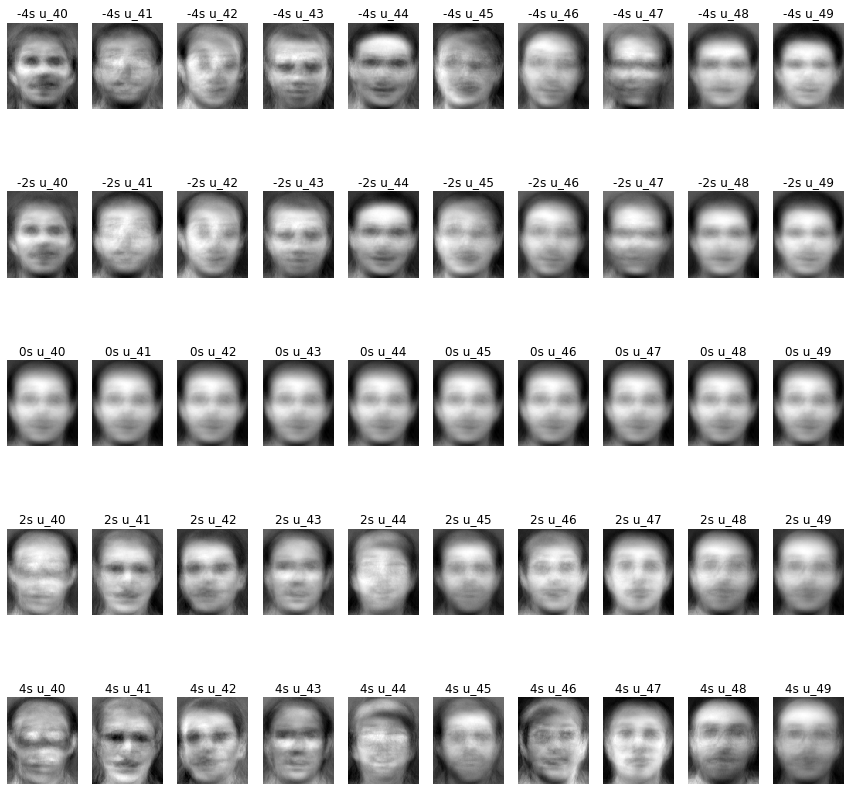

In [0]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
columns = 10 #show most significant 10 directions
rows = 5 #iterate 4 stdDev 2 forward, 2 backwards 1 netural
StdDevCoeff=-4
print(len(transformedContent))
print(len(transformedContent[0]))

for i in range(rows):
    for j in range(columns):
      init=mean+StdDevCoeff*stDevs[40+i]*vT[40+j]
      g=np.reshape(init, (-1, 92))
      subImg=fig.add_subplot(rows, columns, i*columns+j+1) 
      subImg.set_title((str(StdDevCoeff)+'s u_'+str(40+j)))  # set title
      plt.imshow(g, cmap='gray', interpolation='none') 
      plt.axis('off')
    StdDevCoeff+=2  

plt.show()



I printed $\mu +i\sigma_ku_k$ for $i=\{-4-2,0,2,4\}$ and $40 \leq k <50$ where $\mu$ is the mean face, $\sigma_k$ is the standard deviation at i-th direction. $u_k$ is the k-th eigen vector

**CLASSIFICATION**

Below, I apply k-nearest-neighbor classification technique.

First, I create a validation set

In [0]:
#vT is the eigenVector set
#mean is the meanImage
#transformedContent is transformed version of train set, which mean is subtracted and multiplied by eigenvectors, hterefore I am skipping those parts


transformedTrainContent=transformedContent[:]

import random
def DivideValidSetRandomly(inputContent):
    trainLabeled=[]
    validLabeled=[]
    for i in range(len(inputContent)//8):
      class_=i+1
      num1=random.randrange(8)
      num2=random.randrange(8)
      while(num1==num2):num2=random.randrange(8)
      for j in range(8):
        if(num1!=j and num2!=j):
          trainLabeled.append((inputContent[i*8+j],class_))
        else:
          validLabeled.append((inputContent[i*8+j],class_))

    return (trainLabeled,validLabeled)


trainSet,validSet=DivideValidSetRandomly(transformedTrainContent)       

#I want to try K>1 also
def Test(trainSet,validSet,K):
    score=0
    for i in range(len(validSet)):
      #print(validSet[i][1])#real class
      distances=list(map(lambda x:(np.linalg.norm(x[0]-validSet[i][0]),x[1]),trainSet))      
      #distances=list(map(lambda x:(x[0].dot(validSet[i][0]),x[1]),trainSet)) to test if it works better with cosine sim
      sorted_ = sorted(distances, key=lambda tup: tup[0])[:K]
      mapped_ = list(map(lambda x:x[1],sorted_))
      maxElem=max(set(mapped_), key=mapped_.count)
      if(maxElem==validSet[i][1]):
        score+=1
    return score/len(validSet)


print(Test(trainSet,validSet,1))
allTrainSet=trainSet+validSet

0.9875


I tried to optimize on K by creating a avalidation set but it did not work. I observed the best results with K=1

In [0]:

with open('X_test.csv') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
content = list(map(lambda x: (list(map(lambda y:int(y),x.split(',')))),content))
testContent = list(map(lambda x:np.array(x),content))
subtractedTestContent=list(map(lambda x:x-mean,testContent))
transformedTestContent=list(map(lambda x:vT.dot(x),subtractedTestContent))

labeledContent=[]
for i in range(0,len(transformedTestContent)):
    labeledContent.append((transformedTestContent[i],i//2+1))


lenTest=len(labeledContent)
print('Test Content: ',lenTest)
print(Test(allTrainSet,labeledContent,1))


#does not really need to read label files, as they are ordered an can be coded thorugh iterator variable i
#for i in range(len(transformedTestContent))

Test Content:  80
0.95


**Above code prints success as 0.95. !!!**

Let's print out the first two images from the test set and their matches

image:  0
[(2764.360321481343, 4)]
0
0
image:  1
[(2429.2161213097147, 7)]
0
0


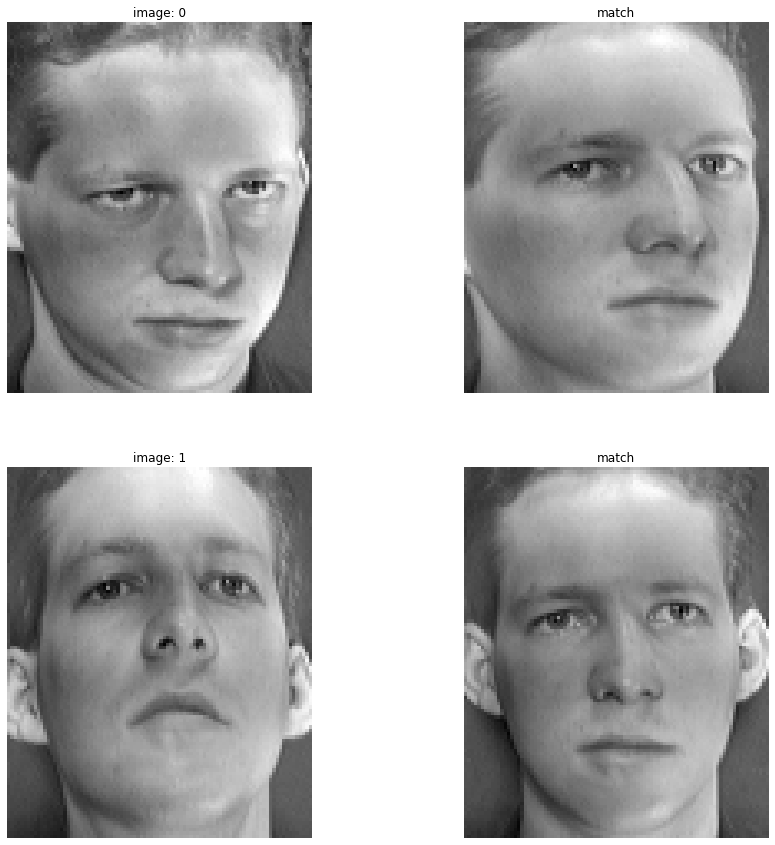

In [0]:

fig = plt.figure(figsize=(15, 15))
columns = 2 #show most significant 10 directions
rows = 2 #iterate 4 stdDev 2 forward, 2 backwards 1 netural

#label train set

trainSetInd=[]
for i in range(len(transformedTrainContent)):
  trainSetInd.append((transformedTrainContent[i],i)) #label with image IDs

T=0  #change it for viewing another couple
for i in range(0+T,2+T):
  print('image: ',i)
  distances=list(map(lambda x:(np.linalg.norm(x[0]-transformedTestContent[i]),x[1]),trainSetInd))
  sorted_ = sorted(distances, key=lambda tup: tup[0])[:1]
  mapped_ = list(map(lambda x:x[1],sorted_))
  maxElem=max(set(mapped_), key=mapped_.count)
  print(sorted_)
  g=np.reshape(subtractedTestContent[i], (-1, 92))
  subImg=fig.add_subplot(rows, columns, 2*(i-T)+1) 
  subImg.set_title('image: '+str(i))
  plt.imshow(g, cmap='gray', interpolation='none') 
  plt.axis('off')
  g=np.reshape(SubtractedContent[maxElem], (-1, 92))
  subImg=fig.add_subplot(rows, columns, 2*(i-T)+2) 
  subImg.set_title('match')
  plt.imshow(g, cmap='gray', interpolation='none') 
  plt.axis('off')


plt.show()

change the variable T to see different couple